DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

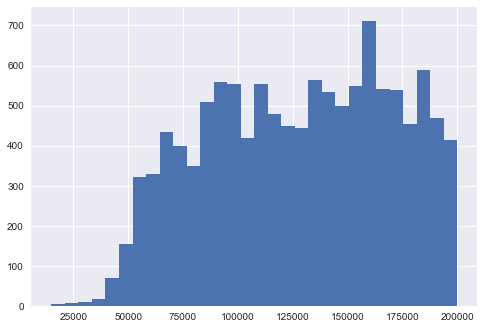

In [11]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


st.title('California Housing Data (1990) by Dane Zimmerman')
df= pd.read_csv('housing.csv')

# note that you have to use 0.0 and 40.0 qiven that the data type of population is float
price_filter = st.slider ('Median House Price:', 0.0,500001.0, 200000.0)

location_filter = st.sidebar.multiselect(

    'Choose the location',

    df.ocean_proximity.unique(),
    df.ocean_proximity.unique())
income_filter =st. sidebar.radio('Choose income level',('Low','Medium','High' ))

df= df[df.median_house_value <= price_filter]
df = df[df.ocean_proximity.isin(location_filter)]

if income_filter =='Low':

    df[df.median_income<=2.5]
elif income_filter == 'Medium':
    df[ (df.median_income< 2.5) & (df. median_income < 4.5) ]
elif income_filter =='High':
    df[df.median_income >=4.5]

st.subheader('See more filters in the sidehar')
st.map(df)
st. subheader('Histogram of the Median House Value')

fig, ax=plt. subplots()

df.median_house_value.hist(ax=ax, bins=30)

st.pyplot (fig)
